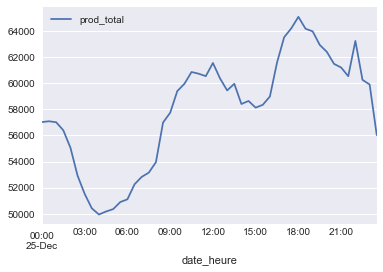

In [20]:
"""
Plot any timeserie taken from the https://rte-opendata.opendatasoft.com plateform.
Choose parameters below after visiting the portal

https://rte-opendata.opendatasoft.com/api/records/1.0/search/?dataset={}&refine.date_heure={}

Step 1 : find the right url on rte-opendata.opendatasoft.com
Step 2 : request it 
Step 3 : save the response it json format
Step 4 : create a dataframe with the data with pd.DataFrame.from_dict
Step 5 : Clean the datetime column
Step 6 : plot
"""


%matplotlib inline
import re
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import seaborn

# This is the only thing you should modify
DATASET = "cdc_prod_par_filiere"
DATE= "2015-12-25".replace('-','%2F')
ROWS = 100
Y = 'prod_total'

url = "https://rte-opendata.opendatasoft.com/api/records/1.0/search/?dataset={}&rows={}&refine.date_heure={}".format(DATASET,ROWS,DATE)  
data = requests.get(url).json()

records = []

for d in data["records"]:
    records.append(d["fields"])
    
df = pd.DataFrame.from_dict(records)

df['date_heure'] = pd.to_datetime(df['date_heure'])

df.sort_values(by='date_heure',inplace=True)
df.plot(x='date_heure',y=Y)


In [21]:
df['my new column'] = df['prod_bioenergies'] + 100*df['prod_eolien']